In [59]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# Скачивание набора данных Fashion MNIST

In [60]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Анализ данных

In [15]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [21]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [27]:
len(test_labels)

10000

# Предварительная обработка данных

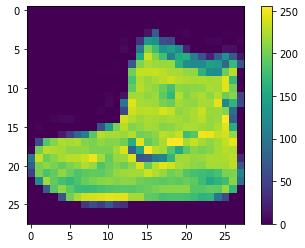

In [62]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [63]:
# Масштабирование в пределах от 0 до 1
train_images = train_images / 255.0

test_images = test_images / 255.0

# Проверка корректности обучающих данных

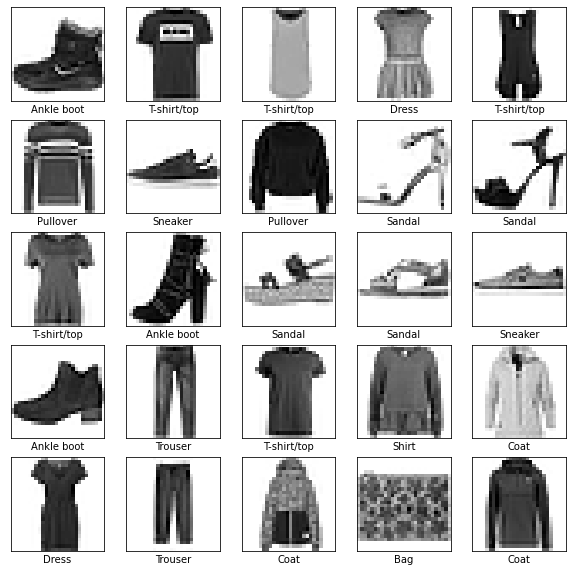

In [64]:
# Выводим первые 25 обучающих данных
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Построение модели

## Настройка слоев

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# преобразует двумерный 28*28 массив в одномерный 784
    keras.layers.Dense(128, activation='relu'),# сетка правил
    keras.layers.Dense(10)# оценка что изображение принадлежит одному из классов
])

## Компиляция модели

In [67]:
model.compile(optimizer='adam',# оптимизатор?
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# на сколько модель точна во время обучения
              metrics=['accuracy'])# метрика точности модели

# Обучение модели

## Накормить модель тренировочными данными

In [98]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0437 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.0479 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.0431 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0442 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0440 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0434 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0423 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.0442 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 2s 996us/step - los

## Оценить точность

In [99]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность теста:', test_acc)

313/313 - 0s - loss: 0.8502 - accuracy: 0.8860

Точность теста: 0.8859999775886536


## Предсказания модели

Прогноз это массив из 10(в данном случае) чисел , которые показывают «уверенность» модели в том, что изображение соответствует каждому из 10 различных предметов одежды.

In [100]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [101]:
predictions = probability_model.predict(test_images)

In [103]:
predictions[0]

array([0.00000000e+00, 0.00000000e+00, 9.32780481e-34, 0.00000000e+00,
       0.00000000e+00, 2.81936531e-20, 1.18621245e-29, 2.42897468e-17,
       4.13575588e-30, 1.00000000e+00], dtype=float32)

In [104]:
np.argmax(predictions[0])# предположение модели

9

In [105]:
test_labels[0]# реальные данные

9

Постройте график, чтобы увидеть полный набор из 10 прогнозов класса

In [106]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Проверка прогнозов

Метки правильного прогноза отображаются синим цветом, а метки неверного прогноза - красным. Число показывает процент (из 100) предсказанной метки.

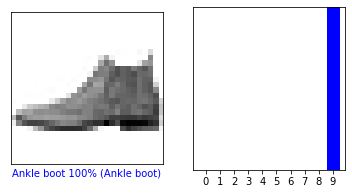

In [107]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

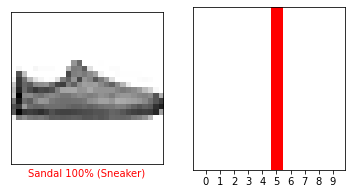

In [109]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

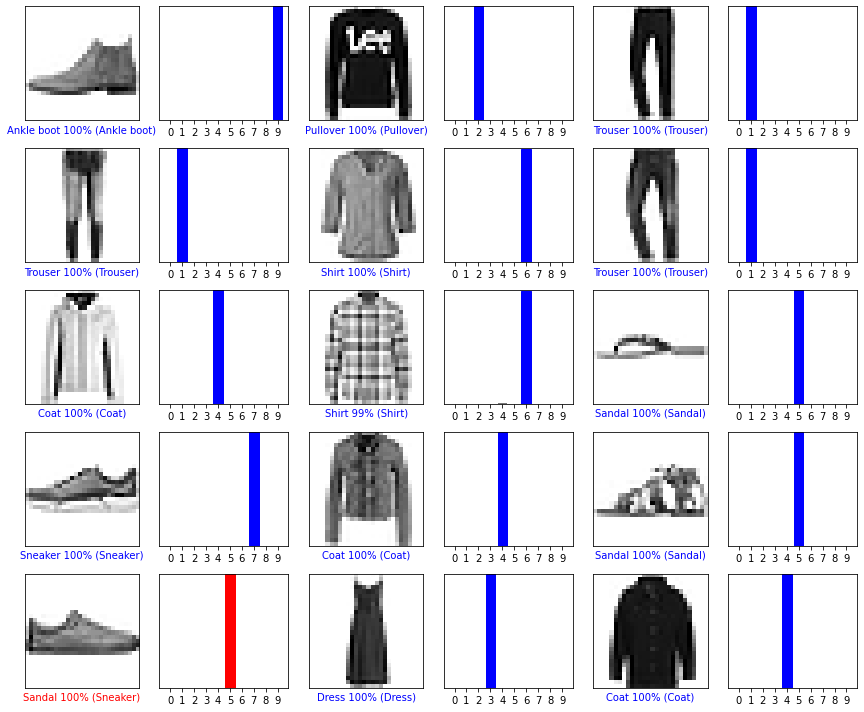

In [112]:
# Построение первых X тестовых изображений, их предсказанные метки и истинные метки.
# Правильные прогнозы раскрасьте синим цветом, а неправильные - красным.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Теперь можно использовать обученную модель

In [123]:
# Взять одно изображение из тестовых.
img = test_images[1]

print(img.shape)

(28, 28)


tf.kerasмодели оптимизированы для одновременного прогнозирования партии или коллекции примеров. Соответственно, даже если вы используете одно изображение, вам необходимо добавить его в список:

In [124]:
# Добавить изображение в пакет, в котором он единственный участник.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Теперь спрогнозируйте правильную метку для этого изображения:

In [125]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.6269003e-11 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4797942e-11
  2.6036683e-36 3.9164895e-16 0.0000000e+00 9.5471105e-27 0.0000000e+00]]


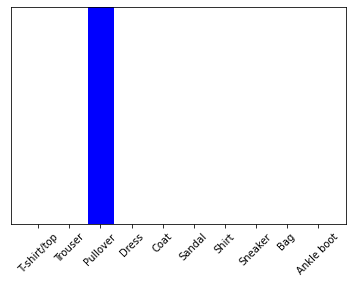

In [126]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [127]:
np.argmax(predictions_single[0])

2